In [12]:
import numpy as np
import scipy.constants as sc
import Yb_polarizability_calc as Ybpc
import Yb_polarizability_calc_Tang as YbpcT
import matplotlib.pyplot as plt
from sympy.physics.wigner import wigner_6j

# takahashi polarizabilities 532

Takahashi gives 532 nm Yb polarizabilities of 1S0 and 3P1:
https://iopscience.iop.org/article/10.1088/1367-2630/18/2/023016/pdf

$\alpha'_g$ = 37.9 Hz cm$^2$/W

$\alpha_e^{'(0)}$ = 22.4 Hz cm$^2$/W

$\alpha_e^{'(2)}$ = -7.6 Hz cm$^2$/W

where $\Delta E_g = -\alpha_g^{(0)} |E_0|^2 $ and

$\Delta f_g = -\alpha_g^{(0)} \frac{|E_0|^2}{2\pi \hbar} = -\alpha_g^{(0)} \frac{2\eta I}{2\pi \hbar}$

implies that

$\alpha_g' = 2\eta \alpha_g$ with a factor of 1/4 missing relative to the definition from the paper:

$$
\Delta f_g = -\frac{1}{4}\alpha_g' I
$$

but when I calculate the polarizability of the ground state below, I get 38 Hz, close to their number, without this factor of 1/4.

The magic wavelength/angle condition from Takahashi and Thompson papers is given by Steck Quantum Optics (for linear polarization only, no vector polarizability, need to revisit for tweezer maybe):

$$
\Delta E_e = -\alpha^{(0)} |E_0^{(+)}|^2 - \alpha^{(2)} \frac{1}{2} \left( 3 |E_{0z}^{(+)}|^2 - |E_{0}^{(+)}|^2 \right) \left( \frac{3 m_F^2 -F(F+1)}{F(2F-1)} \right) \\
= -\alpha^{(0)} E_0^2 - \alpha^{(2)} \frac{E_0^2}{2} \left( 3 cos^2(\theta) - 1 \right) \left( \frac{3 m_F^2 -F(F+1)}{F(2F-1)} \right)
$$

for angle $\theta$ between the quantization axis and the E-field polarization.

For $\theta=0$, $m_F=0$, and $^{174}$Yb,

$$
\Delta E_e = -37.60 |E_0^{(0)}|^2
$$

or $\Delta E_e/\Delta E_g = 0.992$

Note, only works in low field case where quantization axis is defined by tensor shift like in Thompson, or in the case where large magnetic field is aligned along parallel with the 532 polarization.

For $^{171}$Yb, $F=1/2$ or $3/2$ in 3P1, so we can get:

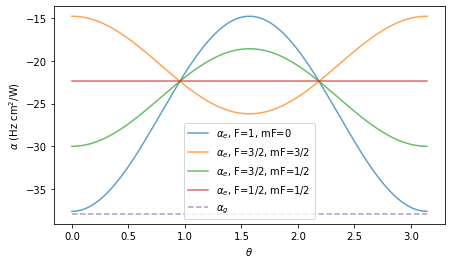

In [14]:
fig, ax = plt.subplots(figsize=[7,4])
thetas = np.linspace(0,np.pi,200)
plt.plot(thetas, alphae(1, 0, thetas), label=r'$\alpha_e$, F=1, mF=0', alpha=0.7)
plt.plot(thetas, alphae(3/2, 3/2, thetas), label=r'$\alpha_e$, F=3/2, mF=3/2', alpha=0.7)
plt.plot(thetas, alphae(3/2, 1/2, thetas), label=r'$\alpha_e$, F=3/2, mF=1/2', alpha=0.7)
plt.plot(thetas, alphae(1/2, 1/2, thetas), label=r'$\alpha_e$, F=1/2, mF=1/2', alpha=0.7)
plt.plot([0,np.pi],[-37.9,-37.9], '--', alpha=0.7, label=r'$\alpha_g$')
plt.ylabel(r'$\alpha$ (Hz cm$^2$/W)')
plt.xlabel(r'$\theta$')
plt.legend()

In [3]:
37.6/37.9

0.9920844327176782

In [4]:
-22.4+7.6*((3-1)/2)*(-2)

-37.599999999999994

In [7]:
print(alphae(3/2, 3/2, np.pi/2))

-26.2


In [8]:
def lfac(F, mF):
    return ((3*(mF**2)-F*(F+1))/(F*(2*F-1)))

In [9]:
lfac(3/2, 1/2), lfac(3/2, 3/2)

(-1.0, 1.0)

In [13]:
def alphae(F, mF, theta):
    if (F==1/2):
        alpha = -22.4*np.ones(len(theta))
    else:
        alpha = -22.4 + 7.6*(1/2)*(3*(np.cos(theta)**2)-1)*((3*(mF**2)-F*(F+1))/(F*(2*F-1)))
#         alpha = -22.4 + 7.6*(1/2)*(3*(np.cos(theta)**2)-1)*(3*(mF**2)-2)
    return alpha

# Yb171

In [15]:
Efield = np.sqrt(2*377*(2e-3))*np.array([1,1,0])

In [16]:
au = 1.64877727436e-41
Yb1S0 = Ybpc.initial_state(0, 1/2, 1/2, 0)
Yb3P1 = Ybpc.initial_state(1, 1/2, 3/2, 0)

In [16]:
Ybpc.alpha_scalar(Yb1S0, Ybpc.final_states_1S0)(2*np.pi*sc.c/(532e-9))/au

498.21475991914

In [17]:
float(Ybpc.alpha_scalar(Yb3P1, Ybpc.final_states_3P1)(2*np.pi*sc.c/(532e-9))/au)

67.8242787400764

In [18]:
float(Ybpc.alpha_vector(Yb3P1, Ybpc.final_states_3P1)(2*np.pi*sc.c/(532e-9)))/au

-24.096931214500295

In [19]:
float(Ybpc.alpha_tensor(Yb3P1, Ybpc.final_states_3P1)(2*np.pi*sc.c/(532e-9)))/au

61.10562012279762

In [199]:
Ybpc.alpha_vector(Yb1S0, Ybpc.final_states_1S0)(2*np.pi*sc.c/(532e-9))/au

0.0

In [339]:
(1e4)*alphaScalar1S0(2*np.pi*sc.c/(532e-9))*2*np.sqrt((4*np.pi*(1e-7)/sc.epsilon_0))/(2*np.pi*sc.hbar)

47.34612909888413

In [340]:
(1e4)*alphaScalar3P1(2*np.pi*sc.c/(532e-9))*2*np.sqrt((4*np.pi*(1e-7)/sc.epsilon_0))/(2*np.pi*sc.hbar)

-16.080341665429284

In [342]:
(1e4)*float(Ybpc.alpha_vector(Yb3P1, Ybpc.final_states_3P1)(2*np.pi*sc.c/(532e-9)))*2*np.sqrt((4*np.pi*(1e-7)/sc.epsilon_0))/(2*np.pi*sc.hbar)

-11.501811098379454

In [343]:
(1e4)*float(Ybpc.alpha_tensor(Yb3P1, Ybpc.final_states_3P1)(2*np.pi*sc.c/(532e-9)))*2*np.sqrt((4*np.pi*(1e-7)/sc.epsilon_0))/(2*np.pi*sc.hbar)

6.588762046603889

In [354]:
print(
    (1e4)*float(Ybpc.alpha_scalar(Yb1S0, Ybpc.final_states_1S0)(2*np.pi*sc.c/(532e-9)))*2*np.sqrt((4*np.pi*(1e-7)/sc.epsilon_0))/(2*np.pi*sc.hbar),
(1e4)*float(Ybpc.alpha_scalar(Yb3P1, Ybpc.final_states_3P1)(2*np.pi*sc.c/(532e-9)))*2*np.sqrt((4*np.pi*(1e-7)/sc.epsilon_0))/(2*np.pi*sc.hbar),
(1e4)*float(Ybpc.alpha_vector(Yb3P1, Ybpc.final_states_3P1)(2*np.pi*sc.c/(532e-9)))*2*np.sqrt((4*np.pi*(1e-7)/sc.epsilon_0))/(2*np.pi*sc.hbar),
    (1e4)*float(Ybpc.alpha_tensor(Yb3P1, Ybpc.final_states_3P1)(2*np.pi*sc.c/(532e-9)))*2*np.sqrt((4*np.pi*(1e-7)/sc.epsilon_0))/(2*np.pi*sc.hbar)
)

47.34612909888413 -14.796192121681404 -11.501811098379454 6.588762046603889


In [205]:
alphaScalar1S0 = Ybpc.alpha_scalar(Yb1S0, Ybpc.final_states_1S0)
alphaScalar3P1 = Ybpc.alpha_scalar(Yb3P1, Ybpc.final_states_3P1)
totalShift = Ybpc.total_shift(Yb3P1, Ybpc.final_states_3P1, Efield)

In [206]:
l = np.linspace(2e-7, 7e-7, 200)
w = 2*np.pi*sc.c/l

(-1000.0, 1000.0)

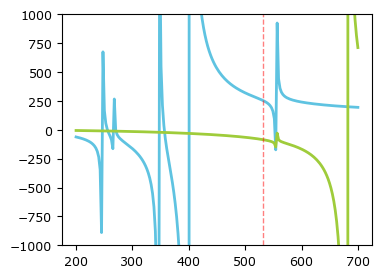

In [207]:
plt.plot(l*(1e9), alphaScalar1S0(w)/au, alpha=0.7)
plt.plot(l*(1e9), alphaScalar3P1(w)/au)
plt.plot([532,532],[-1e3,1e3],'r--', linewidth=1, alpha=0.5)
plt.ylim([-1e3,1e3])

# Yb171 w/ Tang coefficients

# test Yb174

In [19]:
Yb1741S0 = Ybpc.initial_state(0, 0, 0, 0)
Yb1743P0 = Ybpc.initial_state(0, 0, 0, 0)
Yb1743P1 = Ybpc.initial_state(1, 0, 1, 0)

In [20]:
Efield = np.sqrt(2*377*(2e-3))*np.array([0,0,1])

In [21]:
alphaScalar1741S0 = Ybpc.alpha_scalar(Yb1741S0, Ybpc.final_states_174_1S0)
alphaScalar1743P1 = Ybpc.alpha_scalar(Yb1743P1, Ybpc.final_states_174_3P1)
totalShift1741S0 = Ybpc.total_shift(Yb1741S0, Ybpc.final_states_174_1S0, Efield)
totalShift1743P1 = Ybpc.total_shift(Yb1743P1, Ybpc.final_states_174_3P1, Efield)

In [22]:
print(
    float(Ybpc.scalar_shift(Yb1743P1, Ybpc.final_states_3P1, Efield)(2*np.pi*sc.c/(532e-9)))/au,
    float(Ybpc.vector_shift(Yb1743P1, Ybpc.final_states_3P1, Efield)(2*np.pi*sc.c/(532e-9)))/au,
    float(Ybpc.tensor_shift(Yb1743P1, Ybpc.final_states_3P1, Efield)(2*np.pi*sc.c/(532e-9)))/au
)

-102.27901234003522 0.0 184.29455029035768


In [23]:
alphaScalar1741S0 = Ybpc.alpha_scalar(Yb1741S0, Ybpc.final_states_174_1S0)
alphaScalar1743P0 = Ybpc.alpha_scalar(Yb1743P0, Ybpc.final_states_174_3P0)
totalShift1741S0 = Ybpc.total_shift(Yb1741S0, Ybpc.final_states_174_1S0, Efield)
totalShift1743P0 = Ybpc.total_shift(Yb1743P0, Ybpc.final_states_174_3P0, Efield)

In [24]:
alphaTensor1743P0 = Ybpc.alpha_tensor(Yb1743P0, Ybpc.final_states_174_3P0)

In [25]:
print(
    (1e4)*float(Ybpc.alpha_scalar(Yb1741S0, Ybpc.final_states_174_1S0)(2*np.pi*sc.c/(532e-9)))*2*np.sqrt((4*np.pi*(1e-7)/sc.epsilon_0))/(2*np.pi*sc.hbar),
(1e4)*float(Ybpc.alpha_scalar(Yb1743P1, Ybpc.final_states_174_3P1)(2*np.pi*sc.c/(532e-9)))*2*np.sqrt((4*np.pi*(1e-7)/sc.epsilon_0))/(2*np.pi*sc.hbar),
(1e4)*float(Ybpc.alpha_vector(Yb1743P1, Ybpc.final_states_174_3P1)(2*np.pi*sc.c/(532e-9)))*2*np.sqrt((4*np.pi*(1e-7)/sc.epsilon_0))/(2*np.pi*sc.hbar),
    (1e4)*float(Ybpc.alpha_tensor(Yb1743P1, Ybpc.final_states_174_3P1)(2*np.pi*sc.c/(532e-9)))*2*np.sqrt((4*np.pi*(1e-7)/sc.epsilon_0))/(2*np.pi*sc.hbar)
)

93.40779556777537 12.716035077148433 -4.517813211836797 11.45638734869835


In [26]:
print(alphaScalar1743P0(2*np.pi*sc.c/(532e-9))/au, alphaScalar1741S0(2*np.pi*sc.c/(532e-9))/au)

20.69933631200678 498.21475991914


In [29]:
(2*np.pi*sc.c/(532e-9))/auf

0.08573119696830694

Text(0, 0.5, '$\\alpha$ (a.u.)')

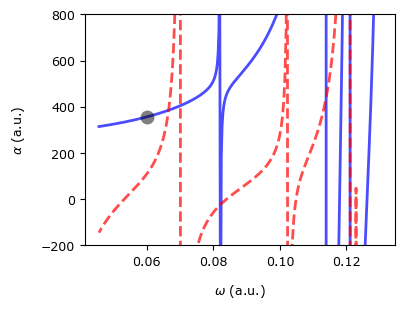

In [28]:
auf = 4.13e16
l = np.linspace(3.5e-7, 1e-6, 400)
w = 2*np.pi*sc.c/l
plt.plot(w/auf, alphaScalar1741S0(w)/au, 'b', alpha=0.7)
plt.plot(w/auf, alphaScalar1743P0(w)/au,  'r--', alpha=0.7)
plt.plot([2*np.pi*sc.c/(759e-9*auf)],alphaScalar1741S0(2*np.pi*sc.c/(759e-9))/au, color='k', marker='o', markersize=10, linewidth=1, alpha=0.5)
plt.ylim([-200,800])
plt.xlabel(r'$\omega$ (a.u.)')
plt.ylabel(r'$\alpha$ (a.u.)')

(-2000.0, 2000.0)

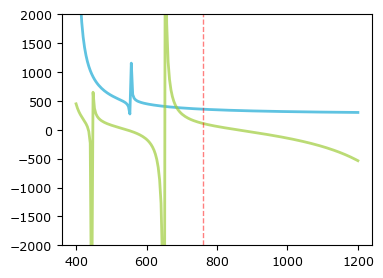

In [82]:
l = np.linspace(4e-7, 2e-6, 200)
w = 2*np.pi*sc.c/l
plt.plot(l*(1e9), alphaScalar1741S0(w)/au, alpha=0.7)
plt.plot(l*(1e9), alphaScalar1743P0(w)/au, alpha=0.7)
plt.plot([759,759],[-2e3,2e3],'r--', linewidth=1, alpha=0.5)
plt.ylim([-2e3,2e3])

# test Yb174 w/ Tang coefficients

using dipole matrix elements from https://www.researchgate.net/publication/325883468_Determination_of_static_dipole_polarizabilities_of_Yb_atom

test just clock transition first

In [31]:
importlib.reload(YbpcT)

<module 'Yb_polarizability_calc_Tang' from '/Users/alec/JILA/analysis/atom_calculations/Yb_polarizability_calc_Tang.py'>

In [32]:
Yb1741S0 = YbpcT.initial_state(0, 0, 0, 0)
Yb1743P0 = YbpcT.initial_state(0, 0, 0, 0)
Yb1743P1 = YbpcT.initial_state(1, 0, 1, 1)

In [33]:
alphaScalar1741S0 = YbpcT.alpha_scalar(Yb1741S0, YbpcT.final_states_174_1S0)
alphaScalar1743P0 = YbpcT.alpha_scalar(Yb1743P0, YbpcT.final_states_174_3P0)
alphaScalar1743P1 = YbpcT.alpha_scalar(Yb1743P0, YbpcT.final_states_174_3P0)

In [34]:
Efield = np.sqrt(2*377*(2e-3))*np.array([0,0,1])
totalShift1741S0 = YbpcT.total_shift(Yb1741S0, YbpcT.final_states_174_1S0, Efield)
totalShift1743P1 = YbpcT.total_shift(Yb1743P1, YbpcT.final_states_174_3P1, Efield)

Text(0, 0.5, '$\\alpha$ (a.u.)')

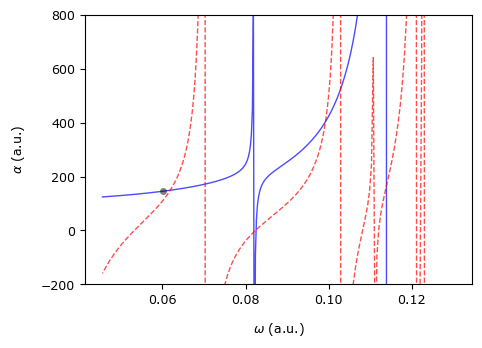

In [25]:
auf = 4.13e16
l = np.linspace(3.5e-7, 1e-6, 400)
w = 2*np.pi*sc.c/l
fig, ax = plt.subplots(figsize=[5,3.5])
plt.plot(w/auf, alphaScalar1741S0(w)/au, 'b', alpha=0.7, linewidth=1)
plt.plot(w/auf, alphaScalar1743P0(w)/au,  'r--', alpha=0.7, linewidth=1)
plt.plot([2*np.pi*sc.c/(759e-9*auf)], alphaScalar1741S0(2*np.pi*sc.c/(759e-9))/au, color='k', marker='o', markersize=5, linewidth=1, alpha=0.5)
plt.ylim([-200,800])
plt.xlabel(r'$\omega$ (a.u.)')
plt.ylabel(r'$\alpha$ (a.u.)')

Text(0, 0.5, '$\\alpha$ (a.u.)')

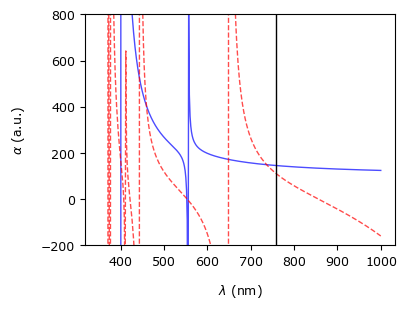

In [14]:
l = np.linspace(3.5e-7, 1e-6, 400)
w = 2*np.pi*sc.c/l
plt.plot(l*(1e9), alphaScalar1741S0(w)/au, 'b', alpha=0.7, linewidth=1)
plt.plot(l*(1e9), alphaScalar1743P0(w)/au,  'r--', alpha=0.7, linewidth=1)
plt.plot([759,759], [-200,800], 'k', linewidth=1)
plt.ylim([-200,800])
plt.xlabel(r'$\lambda$ (nm)')
plt.ylabel(r'$\alpha$ (a.u.)')

Text(0, 0.5, '$\\Delta$E (a.u.)')

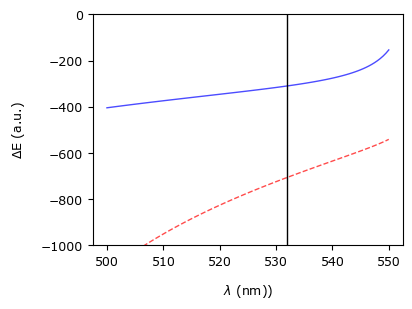

In [15]:
auf = 4.13e16
au = 1.64877727436e-41
l = np.linspace(5e-7, 5.5e-7, 100)
w = 2*np.pi*sc.c/l
Efield = np.sqrt(2*377*(2e-3))*np.array([0,0,1])
totalShift1741S0 = YbpcT.total_shift(Yb1741S0, YbpcT.final_states_174_1S0, Efield)
totalShift1743P1 = YbpcT.total_shift(Yb1743P1, YbpcT.final_states_174_3P1, Efield)
plt.plot(l*(1e9), totalShift1741S0(w)/au, 'b', alpha=0.7, linewidth=1)
plt.plot(l*(1e9), totalShift1743P1(w)/au,  'r--', alpha=0.7, linewidth=1)
plt.plot([532,532],[-1e4,1e4], 'k', linewidth=1)
plt.ylim([-1e3,0])
plt.xlabel(r'$\lambda$ (nm))')
plt.ylabel(r'$\Delta$E (a.u.)')

In [26]:
a1S0scalar = YbpcT.alpha_scalar(Yb1741S0, YbpcT.final_states_174_1S0)
a1S0tensor = YbpcT.alpha_tensor(Yb1741S0, YbpcT.final_states_174_1S0)
a3P1scalar = YbpcT.alpha_scalar(Yb1743P1, YbpcT.final_states_174_3P1)
a3P1tensor = YbpcT.alpha_tensor(Yb1743P1, YbpcT.final_states_174_3P1)

In [27]:
aup = 1.64877727436e-41
a1S0scalar532 = a1S0scalar(2*np.pi*(sc.c/(532e-9)))/aup
a1S0tensor532 = a1S0tensor(2*np.pi*(sc.c/(532e-9)))/aup
a3P1scalar532 = a3P1scalar(2*np.pi*(sc.c/(532e-9)))/aup
a3P1tensor532 = a3P1tensor(2*np.pi*(sc.c/(532e-9)))/aup
a1S0scalar759 = a1S0scalar(2*np.pi*(sc.c/(759e-9)))/aup
a1S0tensor759 = a1S0tensor(2*np.pi*(sc.c/(759e-9)))/aup
a3P1scalar759 = a3P1scalar(2*np.pi*(sc.c/(759e-9)))/aup
a3P1tensor759 = a3P1tensor(2*np.pi*(sc.c/(759e-9)))/aup

In [28]:
def alphael(ascalar, atensor, F, mF, theta):
    if (F==1/2 or F==0):
        alpha = -ascalar*np.ones(len(theta))
    else:
        alpha = -ascalar - atensor*(1/2)*(3*(np.cos(theta)**2)-1)*((3*(mF**2)-F*(F+1))/(F*(2*F-1)))
    return alpha

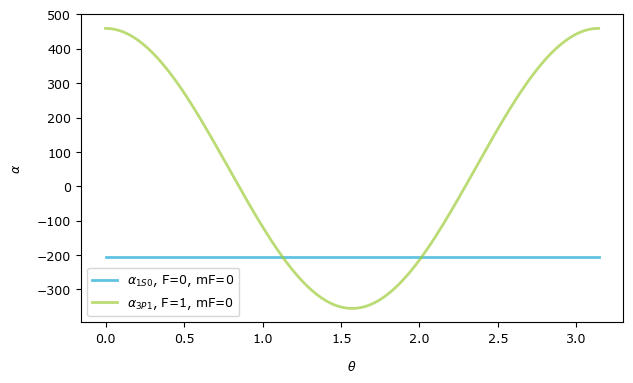

In [29]:
fig, ax = plt.subplots(figsize=[7,4])
thetas = np.linspace(0,np.pi,200)
plt.plot(thetas, alphael(a1S0scalar532, a1S0tensor532, 0, 0, thetas), label=r'$\alpha_{1S0}$, F=0, mF=0', alpha=0.7)
plt.plot(thetas, alphael(a3P1scalar532, a3P1tensor532, 1, 0, thetas), label=r'$\alpha_{3P1}$, F=1, mF=0', alpha=0.7)
plt.ylabel(r'$\alpha$')
plt.xlabel(r'$\theta$')
plt.legend()

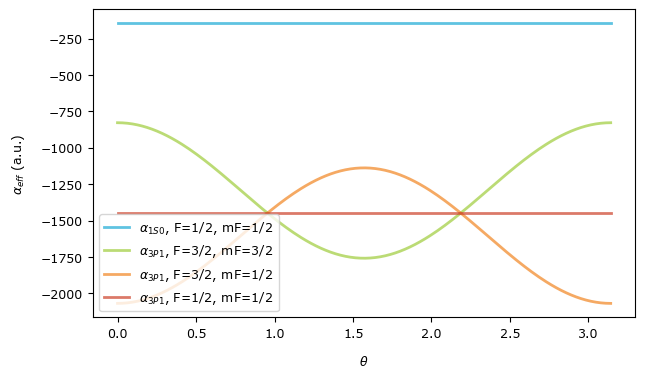

In [30]:
fig, ax = plt.subplots(figsize=[7,4])
thetas = np.linspace(0,np.pi,200)
plt.plot(thetas, alphael(a1S0scalar759, a1S0tensor759, 1/2, 1/2, thetas), label=r'$\alpha_{1S0}$, F=1/2, mF=1/2', alpha=0.7)
plt.plot(thetas, alphael(a3P1scalar759, a3P1tensor759, 3/2, 3/2, thetas), label=r'$\alpha_{3P1}$, F=3/2, mF=3/2', alpha=0.7)
plt.plot(thetas, alphael(a3P1scalar759, a3P1tensor759, 3/2, 1/2, thetas), label=r'$\alpha_{3P1}$, F=3/2, mF=1/2', alpha=0.7)
plt.plot(thetas, alphael(a3P1scalar759, a3P1tensor759, 1/2, 1/2, thetas), label=r'$\alpha_{3P1}$, F=1/2, mF=1/2', alpha=0.7)
plt.ylabel(r'$\alpha_{eff}$ (a.u.)')
plt.xlabel(r'$\theta$')
plt.legend()

## 1P1 and 1S0

In [421]:
Yb1741S0 = YbpcT.initial_state(0, 0, 0, 0)
Yb1741P1 = YbpcT.initial_state(1, 0, 1, 0)

In [422]:
a1S0scalar = YbpcT.alpha_scalar(Yb1741S0, YbpcT.final_states_174_1S0)
a1S0tensor = YbpcT.alpha_tensor(Yb1741S0, YbpcT.final_states_174_1S0)
a1P1scalar = YbpcT.alpha_scalar(Yb1741P1, YbpcT.final_states_174_1P1)
a1P1tensor = YbpcT.alpha_tensor(Yb1741P1, YbpcT.final_states_174_1P1)

In [423]:
aup = 1.64877727436e-41
a1S0scalar532 = a1S0scalar(2*np.pi*(sc.c/(532e-9)))/aup
a1S0tensor532 = a1S0tensor(2*np.pi*(sc.c/(532e-9)))/aup
a1P1scalar532 = a1P1scalar(2*np.pi*(sc.c/(532e-9)))/aup
a1P1tensor532 = a1P1tensor(2*np.pi*(sc.c/(532e-9)))/aup
a1S0scalar759 = a1S0scalar(2*np.pi*(sc.c/(759e-9)))/aup
a1S0tensor759 = a1S0tensor(2*np.pi*(sc.c/(759e-9)))/aup
a1P1scalar759 = a1P1scalar(2*np.pi*(sc.c/(759e-9)))/aup
a1P1tensor759 = a1P1tensor(2*np.pi*(sc.c/(759e-9)))/aup

Text(0, 0.5, '$\\Delta$E (a.u.)')

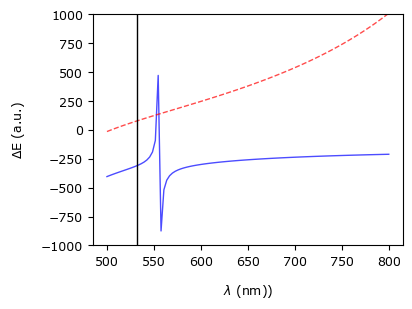

In [418]:
auf = 4.13e16
au = 1.64877727436e-41
l = np.linspace(5e-7, 8e-7, 100)
w = 2*np.pi*sc.c/l
Efield = np.sqrt(2*377*(2e-3))*np.array([0,0,1])
totalShift1741S0 = YbpcT.total_shift(Yb1741S0, YbpcT.final_states_174_1S0, Efield)
totalShift1741P1 = YbpcT.total_shift(Yb1741P1, YbpcT.final_states_174_1P1, Efield)
plt.plot(l*(1e9), totalShift1741S0(w)/au, 'b', alpha=0.7, linewidth=1)
plt.plot(l*(1e9), totalShift1741P1(w)/au,  'r--', alpha=0.7, linewidth=1)
plt.plot([532,532],[-1e4,1e4], 'k', linewidth=1)
plt.ylim([-1e3,1e3])
plt.xlabel(r'$\lambda$ (nm))')
plt.ylabel(r'$\Delta$E (a.u.)')

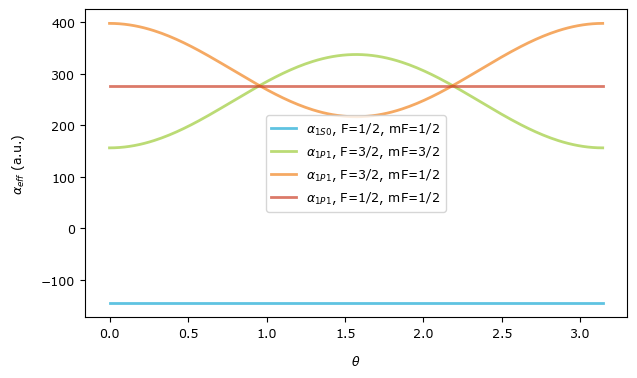

In [424]:
fig, ax = plt.subplots(figsize=[7,4])
thetas = np.linspace(0,np.pi,200)
plt.plot(thetas, alphael(a1S0scalar759, a1S0tensor759, 1/2, 1/2, thetas), label=r'$\alpha_{1S0}$, F=1/2, mF=1/2', alpha=0.7)
plt.plot(thetas, alphael(a1P1scalar759, a1P1tensor759, 3/2, 3/2, thetas), label=r'$\alpha_{1P1}$, F=3/2, mF=3/2', alpha=0.7)
plt.plot(thetas, alphael(a1P1scalar759, a1P1tensor759, 3/2, 1/2, thetas), label=r'$\alpha_{1P1}$, F=3/2, mF=1/2', alpha=0.7)
plt.plot(thetas, alphael(a1P1scalar759, a1P1tensor759, 1/2, 1/2, thetas), label=r'$\alpha_{1P1}$, F=1/2, mF=1/2', alpha=0.7)
plt.ylabel(r'$\alpha_{eff}$ (a.u.)')
plt.xlabel(r'$\theta$')
plt.legend()

# test Sr

In [118]:
import polarizability_calc as Srpc

In [119]:
Sr1S0 = Srpc.initial_state(0, 9/2, 9/2, 9/2)
Sr3P0 = Srpc.initial_state(0, 9/2, 9/2, 9/2)
Sr3P1 = Srpc.initial_state(1, 9/2, 11/2, 11/2)

In [120]:
alphaScalar1S0 = Srpc.alpha_scalar(Sr1S0, Srpc.final_states_1S0)
alphaScalar3P0 = Srpc.alpha_scalar(Sr3P0, Srpc.final_states_3P0)
totalShift1S0 = Srpc.total_shift(Sr1S0, Srpc.final_states_1S0, Efield)
totalShift3P0 = Srpc.total_shift(Sr3P0, Srpc.final_states_3P0, Efield)
totalShift3P1 = Srpc.total_shift(Sr3P1, Srpc.final_states_3P1, Efield)

(-2000.0, 1000.0)

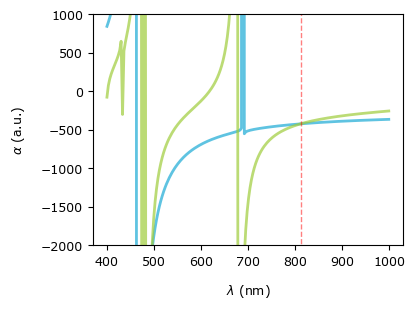

In [123]:
l = np.linspace(4e-7, 1e-6, 200)
w = 2*np.pi*sc.c/l
plt.plot(l*(1e9), totalShift1S0(w)/au, alpha=0.7)
plt.plot(l*(1e9), totalShift3P0(w)/au, alpha=0.7)
plt.plot([813,813],[-4e3,2e3],'r--', alpha=0.5, linewidth=1)
plt.xlabel(r'$\lambda$ (nm)')
plt.ylabel(r'$\alpha$ (a.u.)')
plt.ylim([-2e3,1e3])

(-500.0, 500.0)

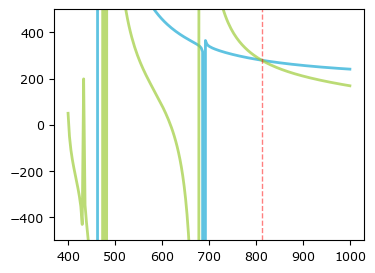

In [126]:
l = np.linspace(4e-7, 1e-6, 200)
w = 2*np.pi*sc.c/l
plt.plot(l*(1e9), alphaScalar1S0(w)/au, alpha=0.7)
plt.plot(l*(1e9), alphaScalar3P0(w)/au, alpha=0.7)
plt.plot([813,813],[-5e2,5e2],'r--', alpha=0.5, linewidth=1)
plt.ylim([-5e2,5e2])

(-4000.0, 2000.0)

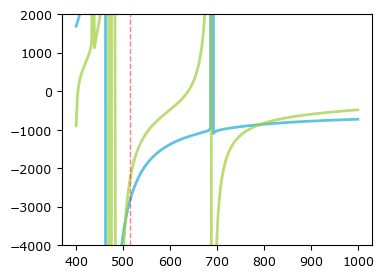

In [122]:
l = np.linspace(4e-7, 1e-6, 200)
w = 2*np.pi*sc.c/l
plt.plot(l*(1e9), totalShift1S0(w)/au, alpha=0.7)
plt.plot(l*(1e9), totalShift3P1(w)/au, alpha=0.7)
plt.plot([515,515],[-4e3,2e3],'r--', alpha=0.5, linewidth=1)
plt.ylim([-4e3,2e3])

# checks

In [191]:
audipole = 8.4783536255e-30
gamma1S03P1 = 2*np.pi*(182.4e3)
Je = 1
Jg = 0
M1S03P1 = ((2*Je+1)/(2*Jg+1))*3*np.pi*sc.epsilon_0*sc.hbar*(sc.c**3)*gamma1S03P1/((2*np.pi*sc.c/(555.8e-9))**3)
np.sqrt(M1S03P1)/audipole

0.5397684160037617

In [193]:
np.sqrt(Ybpc.M(Yb1S0, Ybpc.final_states_1S0['6s2_1S0-6s6p_3P1']))/audipole

0.5397694764692285

# Yb171 3P1 with Tang coefficients

In [17]:
Yb1741S0 = YbpcT.initial_state(0, 0, 0, 0)
Yb1743P0 = YbpcT.initial_state(0, 0, 0, 0)
Yb1743P1 = YbpcT.initial_state(0, 0, 1, 0)

In [18]:
alphaScalar1741S0 = Ybpc.alpha_scalar(Yb1741S0, YbpcT.final_states_174_1S0)
alphaScalar1743P0 = Ybpc.alpha_scalar(Yb1743P0, YbpcT.final_states_174_3P0)
alphaScalar1743P1 = Ybpc.alpha_scalar(Yb1743P0, YbpcT.final_states_174_3P0)

In [19]:
Efield = np.sqrt(2*377*(2e-3))*np.array([0,0,1])
totalShift1741S0 = Ybpc.total_shift(Yb1741S0, Ybpc.final_states_174_1S0, Efield)
totalShift1743P1 = Ybpc.total_shift(Yb1743P1, Ybpc.final_states_174_3P1, Efield)

Text(0, 0.5, '$\\alpha$ (a.u.)')

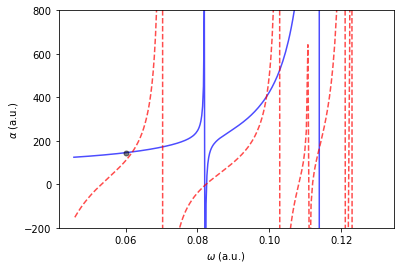

In [20]:
auf = 4.13e16
l = np.linspace(3.5e-7, 1e-6, 400)
w = 2*np.pi*sc.c/l
plt.plot(w/auf, alphaScalar1741S0(w)/au, 'b', alpha=0.7)
plt.plot(w/auf, alphaScalar1743P0(w)/au,  'r--', alpha=0.7)
plt.plot([2*np.pi*sc.c/(759e-9*auf)], alphaScalar1741S0(2*np.pi*sc.c/(759e-9))/au, color='k', marker='o', markersize=5, linewidth=1, alpha=0.5)
plt.ylim([-200,800])
plt.xlabel(r'$\omega$ (a.u.)')
plt.ylabel(r'$\alpha$ (a.u.)')

Text(0, 0.5, '$\\Delta$E (a.u.)')

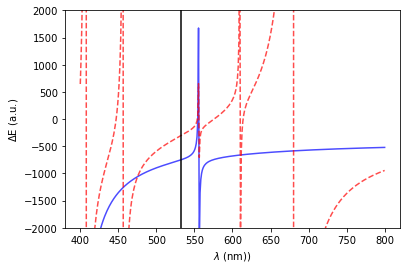

In [21]:
auf = 4.13e16
au = 1.64877727436e-41
l = np.linspace(4e-7, 8e-7, 400)
w = 2*np.pi*sc.c/l
plt.plot(l*(1e9), totalShift1741S0(w)/au, 'b', alpha=0.7)
plt.plot(l*(1e9), totalShift1743P1(w)/au,  'r--', alpha=0.7)
plt.plot([532,532],[-1e4,1e4], 'k')
plt.ylim([-2e3,2e3])
plt.xlabel(r'$\lambda$ (nm))')
plt.ylabel(r'$\Delta$E (a.u.)')

In [22]:
l[358]

7.588972431077694e-07